# Visualize a Decision Tree
*Paulo G. Martinez* Wed. Jun. 3rd, 2020

In this notebook I'll be doing three things:

## Explaining the problem we are trying to solve and the data we'll be working with
## Brief introduction into what a decision tree is and how it can be used to predict the classification of a record
## Brief explanation of why you should almost never rely on a single decision tree
---


**Let's start by importing the software packages I'll be using in the rest of the notebook**

In [5]:
# for plotting
import matplotlib.pyplot as plt
# for os agnostic path handling (handle backslashes vs frontslashes)
from pathlib import Path
# for dataframe manimupation
import pandas as pd
# import tree models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Explaining the problem we are trying to solve and the data we'll be working with
---
### Business Requirement: Improve Usability
- Let's suppose we manage a website for an organization which stores and publishes a large quantity of important content. 
- The organization would like to improve the usability of its site to "just work *you know,* the way Amazon or Google does." 
- However, unlike Amazon or Google which can prioritize paid or trending content and allow the rest to be buried at the end of a search result, our organization is committed to improving usability across all of its content even the content that is rarely relevant, because when it is relevant, its crucial. 
- They want a "quick win" an innovation that radically transforms the usability across all the site and attracts new users
- But it would also be great if you didn't move things around *too* much because their most loyal users already know their way around and get frustrated if they need to learn a whole new layout.

### Proposed Solution: A Content Recomender. 
- A small unobtrusive panel with a short list of "quick links" that takes each user directly to the content they want without having to slog through a long path of clicks, scrolls, and dropdowns and without altering the current structure of the site.
- **We actually are not going to analyze their content and try to correlate it to their search queries**
    - their content is "messy" and hard to access, analyze, or understand
    - their queries are inconsistent
        - they are either "naive" inputs by newcomers accustomed to "google like power"
        - or highly specialize inputs from expert powerusers
- **Instead, we are going to analyze the usage patterns in the the web-session data**
    - and label it according to what content they interacted with
    - The advantages of this data set are 
        - that it is much less likely to have been made "messy" in the past
        - and it is constantly refreshing and updating itself (every time a user uses the sight they add a relevant data record to our set)

**read in the data**

In [2]:
# declare the path to the data
file_path = 'data/example-web-session-data.csv'
# handle os differences in slashes
file_path = Path(file_path)
# read the data into a dataframe
web_sesh_df = pd.read_csv(file_path)
# display the head of the data frame
web_sesh_df.head()

,start_hour,weekday,chrome_browser,firefox_browser,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_DOWNLOAD
0,7.9,3,False,False,False,True,True,False,0
1,6.9,4,False,False,True,False,True,False,0
2,6.7,5,True,True,True,False,False,False,2
3,9.4,4,False,False,False,True,True,False,0
4,9.2,5,True,False,False,False,False,False,2


### About the data
**This data was "synthesized"**
- to be classifiable (i.e. to have a signal a machine learning classifier can "tune in to.")
- The feature/columns were selected (and values were "massaged") to represent some intuitive features about a user's session on a website.

**Suppose we have data on a website's user sessions**. 
Including things like the time they accessed the site, the browser they are using, and which pages they visited and in which order. We also know what file they ultimately downloaded.

**In the real world you'll likely have many more features** for a session's record and they might require some cleaning and restructuring. But even if there are some noisy or redundant features a machine learning model can usually "tune in" to the ones that are "predictive" of the target you are trying to predict.
- **what the algorithm can do** much more efficiently for us is to measure and sort the features by their "correlation" to the target
- **what the algorithm can't do** is make judgement calls about which features are acceptably messy or redundant and which need to be refinend or cleaned.
    - note that the boolean columns are not mutually exclusive, contrary to what you might expect (ex: the data may indicate the user used both firefox and chrome for the same session) 
    - this is merely an artifact of generating synthetic data, but for our "in fiction" purposes we can pretend they are the result of sloppy setup for the session tracking.

### data dictionary
- **start_hour** - a float between 0 and 24 representing the hours in a day
- **weekday** - an integer between 1 and 7 representing the days in a week
- **chrome_browser, firefox_browswer** - a boolean indicating whether the user accessed the site with a given browser
- **1st_page_search, 1st_page_faq** - a boolean indicating which page the user visited first during this session
- **2nd_page_search, 2nd_page_faq** - a boolean indicating which page the user visited second during this session
- **TARGET_DOWNLOAD** - an integer 0, 1, 2, indicating which of three available files a user downloaded at the end of their session

## Brief introduction into what a decision tree is and how it can be used to predict the classification of a record
---
A decision tree is much easier to understand when you can see it. So let's instantiate and plot one on the data before we explain it.

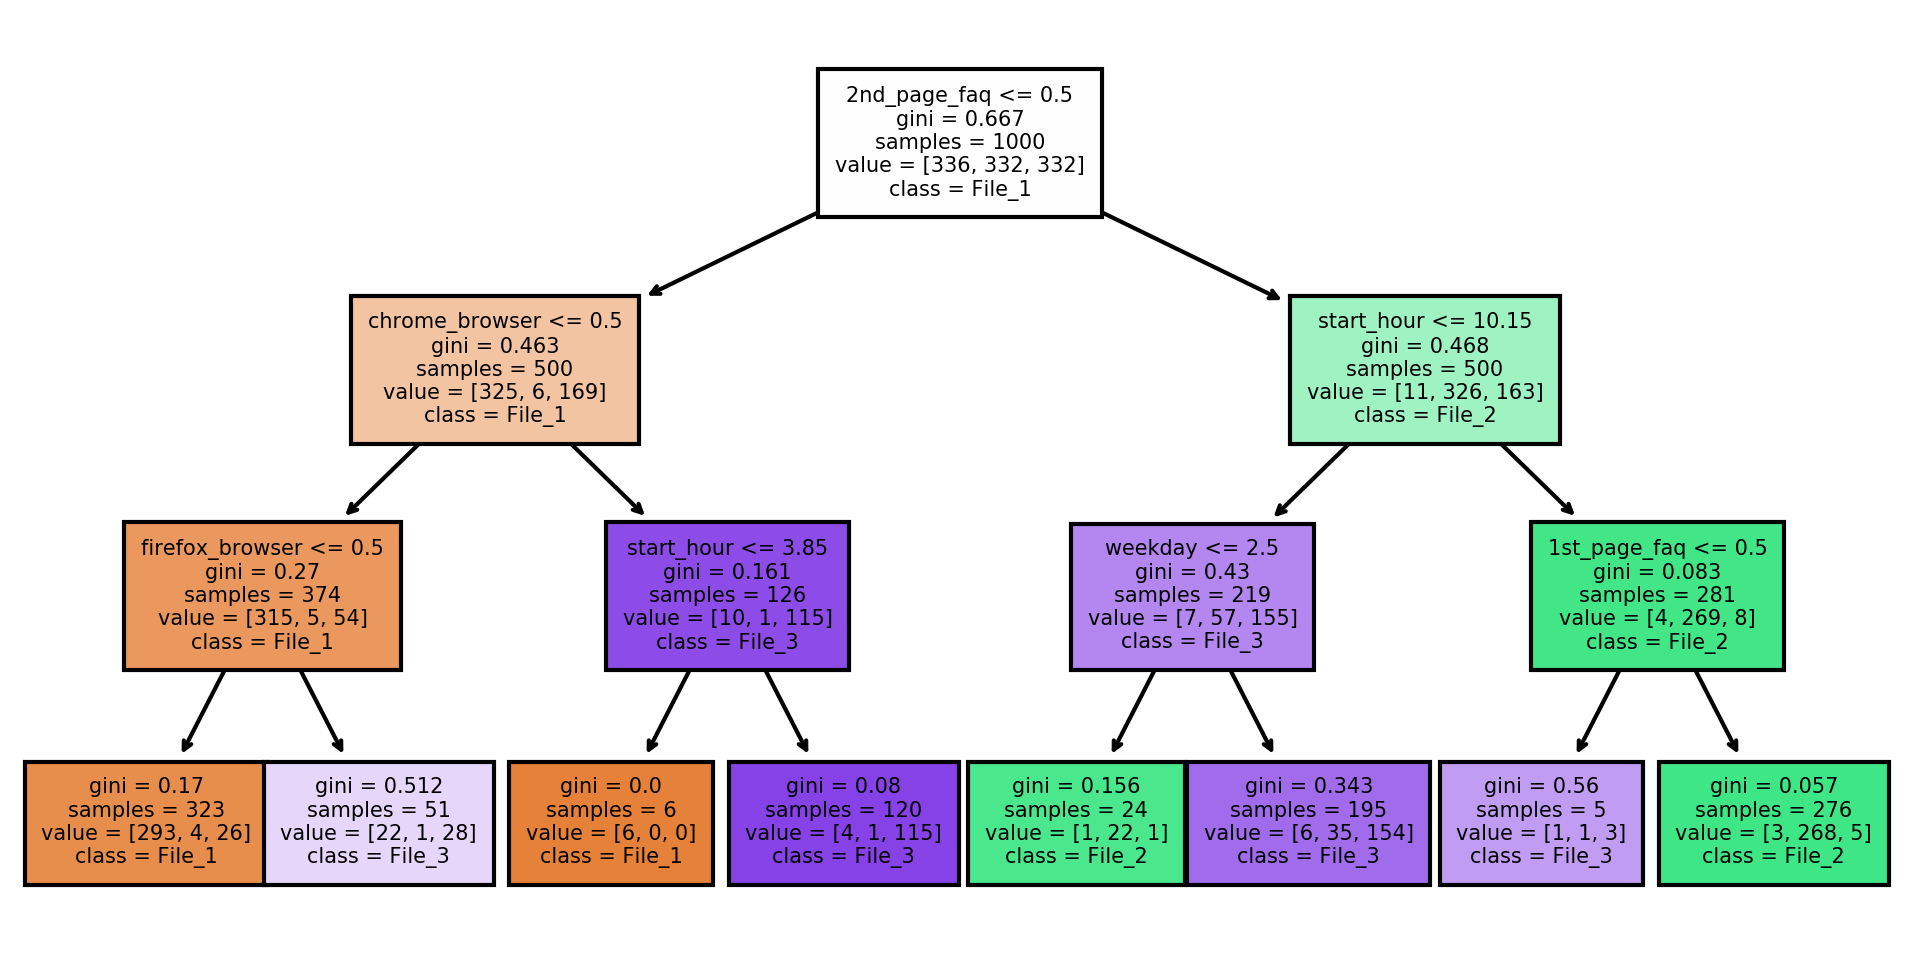

In [18]:
# instantiate a decision tree classifier
classifier = DecisionTreeClassifier(
    # use an integer to ensure reproducible results
    random_state = 1,
    # declare how manny levels we want the tree to have (we'll start with 3 for simplicity)
    max_depth = 3
)
# fit the model to the data
classifier.fit(
    # data without the target
    web_sesh_df.drop(columns = ['TARGET_DOWNLOAD']),
    # target labels/classes
    web_sesh_df['TARGET_DOWNLOAD']
)

# define a figure and axes to plot in
fig, axes = plt.subplots(
    # one by one grid of subplots (aka one plot)
    1,1,
    # size of the figure
    figsize = (8,4),
    # dots per inch
    dpi = 300
)

# plot the tree again
tree.plot_tree(
    # declare the tree to plot
    classifier,
    # feature names, are the column headers (except for the target column)
    feature_names = web_sesh_df.drop(columns = ['TARGET_DOWNLOAD']).columns,
    # [class_1, class_2, ... class_n]
    class_names = ['File_1', 'File_2', 'File_3'],
    # fill in the nodes according to how "pure" the predicted set is at each node
    filled = True,
    fontsize=5,
)
plt.show()